In [2]:
#@title Librerias
import numpy as np
import matplotlib.pyplot as plt

# Actividad 04: Raices y ecuaciones de una variable

---
### Profesor: Juan Marcos Marín Ramírez
#### Métodos Computacionales 2025-1
---

# 1

El método de **Regula Falsi** es una modificación al método de Bisección. Con base en los siguientes pasos, escriba una función que calcule la raiz de una función. Pruebe con $x^2 - 4 = 0$, y examine la convergencia en función de la tolerancia.


### Pasos

1. **Inicialización**:
   - Se parte de un intervalo $[a, b]$ donde $f(a)$ y $f(b)$ tienen signos opuestos.
   - Esto garantiza que hay al menos una raíz en el intervalo (por el teorema del valor intermedio).

2. **Cálculo del punto de intersección**:
   - En lugar de tomar el punto medio como en la bisección, se calcula un punto c usando la siguiente fórmula:
     
     $$c = \frac{a \cdot f(b) - b \cdot f(a)}{f(b) - f(a)}$$

   - Esta fórmula representa la intersección de la línea que conecta los puntos $(a, f(a))$ y $(b, f(b))$ con el eje $x$.

3. **Evaluación y actualización del intervalo**:
   - Se evalúa $f(c)$.
   - Si $f(c) = 0$ (o es menor que una tolerancia establecida), $c$ es la raíz buscada.
   - Si $f(c)$ tiene el mismo signo que $f(a)$, se actualiza $a = c$.
   - Si $f(c)$ tiene el mismo signo que $f(b)$, se actualiza $b = c$.

4. **Iteración**:
   - Se repiten los pasos 2 y 3 hasta que se cumpla un criterio de parada (por ejemplo, $|f(c)| < tolerancia$ o se alcance un número máximo de iteraciones).

In [3]:
def Regula_Falsi(f, a , b, tol = 1e-8, maxiter = 100):
  f_a = f(a)
  f_b = f(b)
  for i in range(maxiter):
    if f_a * f_b > 0:
      raise ValueError('El intervalo no es el adecuado f(a) y f(b) tienen el mismo signo')
    else:
      c = (((a * f_b) - (b * f_a))/(f_b - f_a))
      f_c = f(c)
      if f_c == 0 or abs(f_c) < tol:
        return print(f"La raíz encontrada es {c:.8f}")
      if f_c * f_a > 0:
        a = c
      elif f_c * f_b > 0:
        b = c

In [4]:
f = lambda x: x**2 - 4
a = -5
b = 0
raíz = Regula_Falsi(f, a, b)
raíz

La raíz encontrada es -2.00000000


# 2

Una carga total $Q$ se distribuye uniformemente alrededor de un conductor en forma de anillo de radio $a$. Una carga $q$ se encuentra a una distancia $x$ horizontalmente a través del centro del anillo. La fuerza ejercida sobre la carga por el anillo está dada por:

$$F = \frac{1}{4\piϵ_0}\frac{qQx}{(x^2+a^2)^{3/2}}$$

con $q$ y $Q$ de $2\times 10^{-5}$C.

  * Escriba una función donde ingresen los valores de $a$ y $x$ para hallar la fuerza.
  * Haga un gráfico de $F(x)$ para un anillo de radio $a= 0.85$m para $0.1\leq x\leq 2.0$m
  * Usando el método de Newton-Raphson y otro diferente, para encontrar el valor de $x$ en el cual la fuerza será equivalente a 1.25 N.
  * Encuentre qué sucede si disminuimos el radio con respecto a la fuerza que experimentará la carga $q$.

In [5]:
def fuerza_electrica(a, x):
  epsilon_0 = 8.85418782e-12 #m-3 kg-1 s4 A2
  q = 2 * 10**-5 #C
  Q = 2 * 10**-5 #C
  return (q*Q*x)/((4*np.pi*epsilon_0)*(x**2 + a**2)**(3/2))

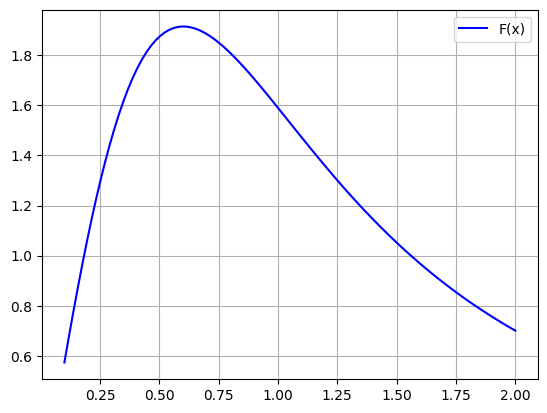

In [6]:
a = 0.85 #m
x = np.linspace(0.1, 2, 100) #m
F = fuerza_electrica(a, x)
plt.plot(x, F, 'b-', label = 'F(x)')
plt.grid()
plt.legend()

In [7]:
from scipy.optimize import newton, bisect

Usando el método de newton el valor de x en el cual la F será igual a 1.25 es x = 0.23944925519555715
La raíz encontrada es 0.23944925


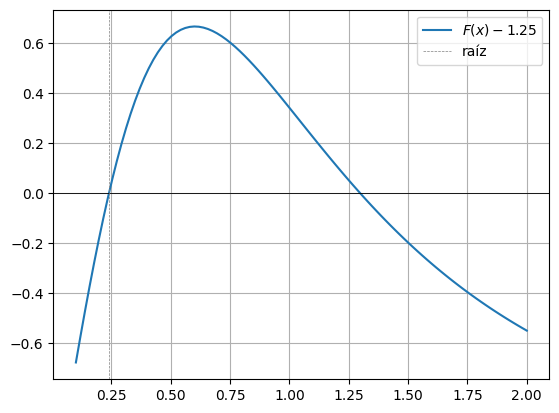

In [8]:
def hallar_fuerza(x):
  return fuerza_electrica(a, x) - 1.25

#Metodo de newton sin derivada
raíz_x = newton(hallar_fuerza, x0 = 0.1)
print(f'Usando el método de newton el valor de x en el cual la F será igual a 1.25 es x = {raíz_x}')

#Para el otro método usaremos el del primer punto
raíz_x1 = Regula_Falsi(hallar_fuerza, 0.1, 0.75)
raíz_x1

#Verifiquemos graficamente
g = hallar_fuerza(x)
plt.plot(x, g, label = '$F(x) - 1.25$')
plt.axhline(0, color = 'black', linewidth=0.6)
plt.axvline(x = raíz_x, color = 'grey', linestyle = '--', label = 'raíz', linewidth=0.5)
plt.grid()
plt.legend()
plt.show()

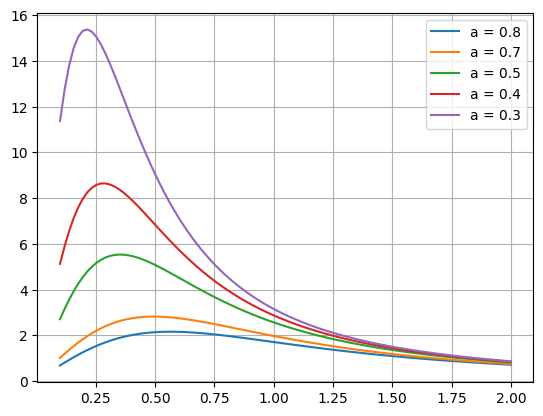

In [9]:
a = [0.8, 0.7, 0.5, 0.4, 0.3]
for i in a:
  F1 = fuerza_electrica(i, x)
  plt.plot(x, F1, label = f'a = {i}')
  plt.legend()
  plt.grid()
#Como vemos, entre más pequeño sea el radio más fuerza experimentará para valores pequeos de x
#Esto se debe a que para los mismos valores de x, entre más pequeño sea el valor de a, el denominador será más pequeño y F(x) será más grande

# 3

La velocidad ascendente $v$ de un cohete se puede calcular mediante
$$v = u\ln \frac{m_0}{m_0 - qt} - gt$$

donde $u$ es la velocidad a la que se expulsa el combustible, $m_0$ la masa inicial del cohete en $t = 0$, $q$ la razón de consumo del combustible y $g = 9.81$ m/s$^2$.

* Escriba una función para $v$ con las variables asociadas.
* Sea $m_0 = 1.6\times 10^5$ kg, $u = 1800$ m/s y $q = 2600$ kg/s realice un grafico de $v(t)$ para $0\leq t\leq 100$ s.
* Encuentre el valor de tiempo para el cual $v = 750$ m/s usando el método de Newton-Raphson, Bisección y el de Regula-Falsi
* Varie los valores de $u$ (utilice por lo menos 20) y encuentre los tiempos para los cuales el cohete alcanzará la velocidad de 750 m/s. Qué conclusiones puede sacar?



In [10]:
g = 9.81 #m/s**2
def velocidad_ascendente(u, m_0, q, t):
  return u * np.log(m_0/(m_0 - q*t)) - (g * t)

<ipython-input-10-b6191f2ba0b2>:3: RuntimeWarning: invalid value encountered in log
  return u * np.log(m_0/(m_0 - q*t)) - (g * t)


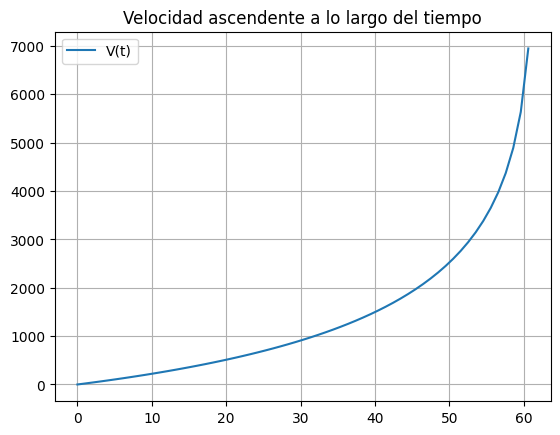

In [11]:
m_0 = 1.6e5 #kg
u = 1800 #m/S
q = 2600 #kg/s
t = np.linspace(0, 100, 100)
v = velocidad_ascendente(u, m_0, q, t)
plt.plot(t, v, label = 'V(t)')
plt.title('Velocidad ascendente a lo largo del tiempo')
plt.grid()
plt.legend()

In [12]:
from sympy import symbols, diff, ln, lambdify

In [13]:
t, u, m_0, q, g = symbols('t u m_0 q g')
v = u * ln(m_0/(m_0 - q*t)) - g*t
dv = diff(v, t)
print(dv)

-g + q*u/(m_0 - q*t)


In [17]:
# Paso 1: Definir variables simbólicas
t = symbols('t')
u, m_0, q, g = 1800, 1.6e5, 2600, 9.8  # valores ejemplo

# Paso 2: Definir función simbólica
v_expr = u * ln(m_0 / (m_0 - q*t)) - g*t - 750

# Paso 3: Derivar simbólicamente
dv_expr = diff(v_expr, t)

# Paso 4: Convertir a funciones numéricas
f = lambdify(t, v_expr, modules='numpy')
f_prime = lambdify(t, dv_expr, modules='numpy')

# Paso 5: Aplicar método de Newton-Raphson
raiz_newton = newton(f, fprime=f_prime, x0=20)
raíz_bisección = bisect(f, 15, 30)
raíz_Regula_Falsi = Regula_Falsi(f, 15, 30)
print(f"Raíz encontrada por newton: t = {raiz_newton:.5f} s")
print(f"Raíz encontrada por bisección: t = {raíz_bisección:.5f} s")
raíz_Regula_Falsi

La raíz encontrada es 26.40147429
Raíz encontrada por newton: t = 26.40147 s
Raíz encontrada por bisección: t = 26.40147 s


In [18]:
u = []
V = 1000
incremento = 100
for i in range(20):
  velocidad = V + i*incremento
  u.append(velocidad)

In [24]:
for i in u:
    def f(t):
        return velocidad_ascendente(i, m_0, q, t) - 750
    try:
        raíz_bisección1 = bisect(f, 0.1, 50)
        print(f'Para u = {i}, el tiempo t en que v = 750 m/s es aproximadamente {raíz_bisección1:.5f} s')
    except ValueError:
        print(f'Para u = {i}, no se encontró raíz en el intervalo dado')

Para u = 1000, el tiempo t en que v = 750 m/s es aproximadamente 42.34236 s
Para u = 1100, el tiempo t en que v = 750 m/s es aproximadamente 39.68697 s
Para u = 1200, el tiempo t en que v = 750 m/s es aproximadamente 37.23628 s
Para u = 1300, el tiempo t en que v = 750 m/s es aproximadamente 34.99011 s
Para u = 1400, el tiempo t en que v = 750 m/s es aproximadamente 32.93946 s
Para u = 1500, el tiempo t en que v = 750 m/s es aproximadamente 31.07078 s
Para u = 1600, el tiempo t en que v = 750 m/s es aproximadamente 29.36861 s
Para u = 1700, el tiempo t en que v = 750 m/s es aproximadamente 27.81723 s
Para u = 1800, el tiempo t en que v = 750 m/s es aproximadamente 26.40147 s
Para u = 1900, el tiempo t en que v = 750 m/s es aproximadamente 25.10729 s
Para u = 2000, el tiempo t en que v = 750 m/s es aproximadamente 23.92187 s
Para u = 2100, el tiempo t en que v = 750 m/s es aproximadamente 22.83372 s
Para u = 2200, el tiempo t en que v = 750 m/s es aproximadamente 21.83259 s
Para u = 230